In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr
import pandas as pd

In [2]:
# Load predictions
def load_predictions(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    return np.array(data['predictions']), np.array(data['ground_truth'])

# Metrics
def accuracy_10mmhg(preds, gts):
    return np.mean(np.abs(preds - gts) <= 10) * 100

def mean_accuracy(preds, gts):
    return (1-np.mean(np.abs((gts - preds) / gts)) )* 100

def compute_metrics(preds, gts):
    mae = mean_absolute_error(gts, preds)
    rmse = mean_squared_error(gts, preds) ** 0.5
    me = np.mean(preds - gts)
    sde = np.std(preds - gts)
    acc_10mmhg = accuracy_10mmhg(preds, gts)
    mean_acc = mean_accuracy(preds, gts)
    pearson_corr, p_value = pearsonr(gts.ravel(), preds.ravel())
    return {
        "ME": me,
        "SDE": sde,
        "MAE": mae,
        "RMSE": rmse,
        "Pearson r": pearson_corr,
        "±10 mmHg Accuracy": acc_10mmhg,
        "Mean Accuracy (%)": mean_acc,
    }
    
# Define the run_ids
run_ids = [
    "_25_SBP_100e",
    "_25_SBP_rPPG_100e",
    "_200_SBP_100e",
    "_200_SBP_rPPG_100e",
    "_25_DBP_100e",
    "_25_DBP_rPPG_100e",
    "_200_DBP_100e",
    "_200_DBP_rPPG_100e"
]

results_dir = "./results"
all_metrics = {}

# Clean the run_ids for display
def clean_run_id(run_id):
    return run_id.strip("_").replace("_100e", "")


In [3]:
for run_id in run_ids:
    train_preds, train_gts = load_predictions(f'{results_dir}/{run_id}_train_predictions.json')
    val_preds, val_gts = load_predictions(f'{results_dir}/{run_id}_val_predictions.json')
    test_preds, test_gts = load_predictions(f'{results_dir}/{run_id}_test_predictions.json')

    train_metrics = compute_metrics(train_preds, train_gts)
    val_metrics = compute_metrics(val_preds, val_gts)
    test_metrics = compute_metrics(test_preds, test_gts)

    baseline_preds_train = np.full_like(train_gts, fill_value=np.mean(train_gts))
    baseline_preds_val = np.full_like(val_gts, fill_value=np.mean(train_gts))
    baseline_preds_test = np.full_like(test_gts, fill_value=np.mean(train_gts))

    baseline_train = compute_metrics(baseline_preds_train, train_gts)
    baseline_val = compute_metrics(baseline_preds_val, val_gts)
    baseline_test = compute_metrics(baseline_preds_test, test_gts)

    all_metrics[run_id] = {
        "Train": train_metrics,
        "Baseline_Train": baseline_train,
        "Validation": val_metrics,
        "Baseline_Val": baseline_val,
        "Test": test_metrics,
        "Baseline_Test": baseline_test
    }

C:\Users\Olli Hantula\AppData\Local\Temp\ipykernel_9900\3297090184.py:21: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, p_value = pearsonr(gts.ravel(), preds.ravel())
C:\Users\Olli Hantula\AppData\Local\Temp\ipykernel_9900\3297090184.py:21: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, p_value = pearsonr(gts.ravel(), preds.ravel())
C:\Users\Olli Hantula\AppData\Local\Temp\ipykernel_9900\3297090184.py:21: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, p_value = pearsonr(gts.ravel(), preds.ravel())
C:\Users\Olli Hantula\AppData\Local\Temp\ipykernel_9900\3297090184.py:21: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, p_value = pearsonr(gts.ravel(), preds.ravel())
C:\Users\Olli Hantula\AppData\Local\Temp\ipykernel_9900\3297090184.py:21: Co

In [4]:
# Example metrics from Hamoud et al. for SBP and DBP across two test sets
hamoud_results = [
    {"Test Set": "Test Set 1", "Target": "SBP", "Model": "Model_1", "MAE": 12.408, "Mean Accuracy (%)": 89.1},
    {"Test Set": "Test Set 1", "Target": "SBP", "Model": "Model_2", "MAE": 14.491, "Mean Accuracy (%)": 87.3},
    {"Test Set": "Test Set 1", "Target": "SBP", "Model": "Model_3", "MAE": 14.174, "Mean Accuracy (%)": 87.8},
    {"Test Set": "Test Set 1", "Target": "SBP", "Model": "Combination(1,2)", "MAE": 11.867, "Mean Accuracy (%)": 89.5},
    {"Test Set": "Test Set 1", "Target": "SBP", "Model": "Combination(1,3)", "MAE": 11.976, "Mean Accuracy (%)": 89.6},
    
    {"Test Set": "Test Set 1", "Target": "DBP", "Model": "Model_1", "MAE": 12.652, "Mean Accuracy (%)": 83.4},
    {"Test Set": "Test Set 1", "Target": "DBP", "Model": "Model_2", "MAE": 11.371, "Mean Accuracy (%)": 85.2},
    {"Test Set": "Test Set 1", "Target": "DBP", "Model": "Model_3", "MAE": 16.071, "Mean Accuracy (%)": 79.5},
    {"Test Set": "Test Set 1", "Target": "DBP", "Model": "Combination(1,2)", "MAE": 10.706, "Mean Accuracy (%)": 86.2},
    {"Test Set": "Test Set 1", "Target": "DBP", "Model": "Combination(1,3)", "MAE": 12.499, "Mean Accuracy (%)": 84.1},
    
    {"Test Set": "Test Set 2", "Target": "SBP", "Model": "Model_1", "MAE": 18.084, "Mean Accuracy (%)": 83.7},
    {"Test Set": "Test Set 2", "Target": "SBP", "Model": "Model_2", "MAE": 16.424, "Mean Accuracy (%)": 84.4},
    {"Test Set": "Test Set 2", "Target": "SBP", "Model": "Model_3", "MAE": 13.749, "Mean Accuracy (%)": 88.2},
    {"Test Set": "Test Set 2", "Target": "SBP", "Model": "Combination(1,2)", "MAE": 17.477, "Mean Accuracy (%)": 84.7},
    {"Test Set": "Test Set 2", "Target": "SBP", "Model": "Combination(1,3)", "MAE": 15.121, "Mean Accuracy (%)": 86.7},

    {"Test Set": "Test Set 2", "Target": "DBP", "Model": "Model_1", "MAE": 12.391, "Mean Accuracy (%)": 83.8},
    {"Test Set": "Test Set 2", "Target": "DBP", "Model": "Model_2", "MAE": 12.697, "Mean Accuracy (%)": 83.02},
    {"Test Set": "Test Set 2", "Target": "DBP", "Model": "Model_3", "MAE": 14.833, "Mean Accuracy (%)": 79.2},
    {"Test Set": "Test Set 2", "Target": "DBP", "Model": "Combination(1,2)", "MAE": 12.012, "Mean Accuracy (%)": 84.07},
    {"Test Set": "Test Set 2", "Target": "DBP", "Model": "Combination(1,3)", "MAE": 11.169, "Mean Accuracy (%)": 84.9},
]

# Convert to DataFrame
hamoud_df = pd.DataFrame(hamoud_results)

# Compute mean and std for each target
summary_stats = hamoud_df.groupby(["Test Set", "Target"]).agg(
    Mean_MAE=("MAE", "mean"),
    Std_MAE=("MAE", "std"),
    Mean_Accuracy=("Mean Accuracy (%)", "mean"),
    Std_Accuracy=("Mean Accuracy (%)", "std")
).reset_index()

# Display the detailed and summary tables
print("Hamoud et al. Reported Results:\n")
print(hamoud_df)

print("\nSummary Statistics of Hamoud et al. Results:\n")
print(summary_stats)

Hamoud et al. Reported Results:

      Test Set Target             Model     MAE  Mean Accuracy (%)
0   Test Set 1    SBP           Model_1  12.408              89.10
1   Test Set 1    SBP           Model_2  14.491              87.30
2   Test Set 1    SBP           Model_3  14.174              87.80
3   Test Set 1    SBP  Combination(1,2)  11.867              89.50
4   Test Set 1    SBP  Combination(1,3)  11.976              89.60
5   Test Set 1    DBP           Model_1  12.652              83.40
6   Test Set 1    DBP           Model_2  11.371              85.20
7   Test Set 1    DBP           Model_3  16.071              79.50
8   Test Set 1    DBP  Combination(1,2)  10.706              86.20
9   Test Set 1    DBP  Combination(1,3)  12.499              84.10
10  Test Set 2    SBP           Model_1  18.084              83.70
11  Test Set 2    SBP           Model_2  16.424              84.40
12  Test Set 2    SBP           Model_3  13.749              88.20
13  Test Set 2    SBP  Combin

In [5]:
# Extract only the test set metrics
test_metrics_summary = {
    run_id: metrics["Test"] for run_id, metrics in all_metrics.items()
}

test_metrics_summary_df = pd.DataFrame(test_metrics_summary).T

# Display the summary table
print("Test Set Performance Summary:")
display(test_metrics_summary_df.round(4))

Test Set Performance Summary:


,ME,SDE,MAE,RMSE,Pearson r,±10 mmHg Accuracy,Mean Accuracy (%)
_25_SBP_100e,3.0188,22.6813,18.8290,22.8813,0.0216,29.5933,82.8523
_25_SBP_rPPG_100e,-0.2643,22.6218,18.3341,22.6234,0.0796,32.6724,83.6683
_200_SBP_100e,6.4266,22.2683,18.8748,23.1771,0.0271,31.1019,82.4773
_200_SBP_rPPG_100e,7.2337,22.1052,19.1526,23.2587,0.1108,29.9763,82.2692
_25_DBP_100e,0.5192,17.9135,14.0918,17.9210,-0.0072,43.7396,80.6138
_25_DBP_rPPG_100e,-1.4996,17.8547,13.8643,17.9176,-0.0051,45.1932,81.2118
_200_DBP_100e,-9.6605,20.5794,16.9125,22.7341,0.0502,42.7725,78.1555
_200_DBP_rPPG_100e,-11.4955,20.1448,17.2170,23.1940,0.0101,41.2322,78.0547


In [13]:
# Create summary tables for each model with all sets and baselines.
summary_tables = {}
for run_id, metrics in all_metrics.items():
    print(run_id)
    df = pd.DataFrame(metrics).T
    summary_tables[run_id] = df
    display(df.round(3))

_25_SBP_100e


,ME,SDE,MAE,RMSE,Pearson r,±10 mmHg Accuracy,Mean Accuracy (%)
Train,-0.489,9.884,7.007,9.897,0.914,78.064,93.807
Baseline_Train,-0.000,20.537,16.254,20.537,NaN,37.774,85.240
Validation,-1.568,22.503,17.415,22.558,0.193,37.414,84.782
Baseline_Val,-0.802,21.477,16.772,21.492,NaN,39.813,85.041
Test,3.019,22.681,18.829,22.881,0.022,29.593,82.852
Baseline_Test,1.909,18.759,15.350,18.856,NaN,37.148,86.062


_25_SBP_rPPG_100e


,ME,SDE,MAE,RMSE,Pearson r,±10 mmHg Accuracy,Mean Accuracy (%)
Train,-1.701,9.655,7.172,9.803,0.908,76.168,93.709
Baseline_Train,0.000,20.537,16.254,20.537,NaN,37.774,85.240
Validation,-4.433,23.547,18.460,23.961,0.083,36.558,84.020
Baseline_Val,-0.802,21.477,16.772,21.492,NaN,39.813,85.041
Test,-0.264,22.622,18.334,22.623,0.080,32.672,83.668
Baseline_Test,1.909,18.759,15.350,18.856,NaN,37.148,86.062


_200_SBP_100e


,ME,SDE,MAE,RMSE,Pearson r,±10 mmHg Accuracy,Mean Accuracy (%)
Train,-1.576,11.126,8.280,11.237,0.902,69.363,92.565
Baseline_Train,-0.000,20.197,16.018,20.197,NaN,38.205,85.437
Validation,0.519,24.302,19.437,24.307,0.036,31.682,82.605
Baseline_Val,-0.407,21.237,16.595,21.241,NaN,39.886,85.112
Test,6.427,22.268,18.875,23.177,0.027,31.102,82.477
Baseline_Test,2.187,18.377,15.053,18.506,NaN,37.500,86.272


_200_SBP_rPPG_100e


,ME,SDE,MAE,RMSE,Pearson r,±10 mmHg Accuracy,Mean Accuracy (%)
Train,-1.503,10.523,7.972,10.630,0.886,70.129,92.905
Baseline_Train,0.000,20.197,16.018,20.197,NaN,38.205,85.437
Validation,-0.743,24.276,19.470,24.287,0.074,31.194,82.725
Baseline_Val,-0.407,21.237,16.595,21.241,NaN,39.886,85.112
Test,7.234,22.105,19.153,23.259,0.111,29.976,82.269
Baseline_Test,2.187,18.377,15.053,18.506,NaN,37.500,86.272


_25_DBP_100e


,ME,SDE,MAE,RMSE,Pearson r,±10 mmHg Accuracy,Mean Accuracy (%)
Train,-0.667,7.678,5.627,7.706,0.891,85.687,92.066
Baseline_Train,-0.000,14.134,11.098,14.134,NaN,54.239,83.889
Validation,-0.914,20.125,15.740,20.146,-0.104,39.390,76.842
Baseline_Val,1.763,16.464,12.831,16.558,NaN,47.821,80.329
Test,0.519,17.914,14.092,17.921,-0.007,43.740,80.614
Baseline_Test,-0.528,14.975,11.494,14.984,NaN,52.913,84.315


_25_DBP_rPPG_100e


,ME,SDE,MAE,RMSE,Pearson r,±10 mmHg Accuracy,Mean Accuracy (%)
Train,-0.101,7.701,5.575,7.702,0.878,86.232,92.065
Baseline_Train,0.000,14.134,11.098,14.134,NaN,54.239,83.889
Validation,0.249,19.313,14.926,19.314,-0.078,43.165,77.886
Baseline_Val,1.763,16.464,12.831,16.558,NaN,47.821,80.329
Test,-1.500,17.855,13.864,17.918,-0.005,45.193,81.212
Baseline_Test,-0.528,14.975,11.494,14.984,NaN,52.913,84.315


_200_DBP_100e


,ME,SDE,MAE,RMSE,Pearson r,±10 mmHg Accuracy,Mean Accuracy (%)
Train,-0.645,7.913,6.015,7.940,0.844,82.384,91.432
Baseline_Train,0.000,13.753,10.838,13.753,NaN,55.423,84.337
Validation,0.472,20.554,16.051,20.559,-0.132,39.724,75.736
Baseline_Val,1.814,16.338,12.750,16.438,NaN,49.147,80.543
Test,-9.661,20.579,16.913,22.734,0.050,42.773,78.155
Baseline_Test,-0.428,14.709,11.211,14.716,NaN,54.265,84.778


_200_DBP_rPPG_100e


,ME,SDE,MAE,RMSE,Pearson r,±10 mmHg Accuracy,Mean Accuracy (%)
Train,-1.848,7.598,5.691,7.820,0.882,85.325,91.882
Baseline_Train,-0.000,13.753,10.838,13.753,NaN,55.423,84.337
Validation,-1.909,21.368,16.730,21.453,-0.168,37.693,75.651
Baseline_Val,1.814,16.338,12.750,16.438,NaN,49.147,80.543
Test,-11.496,20.145,17.217,23.194,0.010,41.232,78.055
Baseline_Test,-0.428,14.709,11.211,14.716,NaN,54.265,84.778


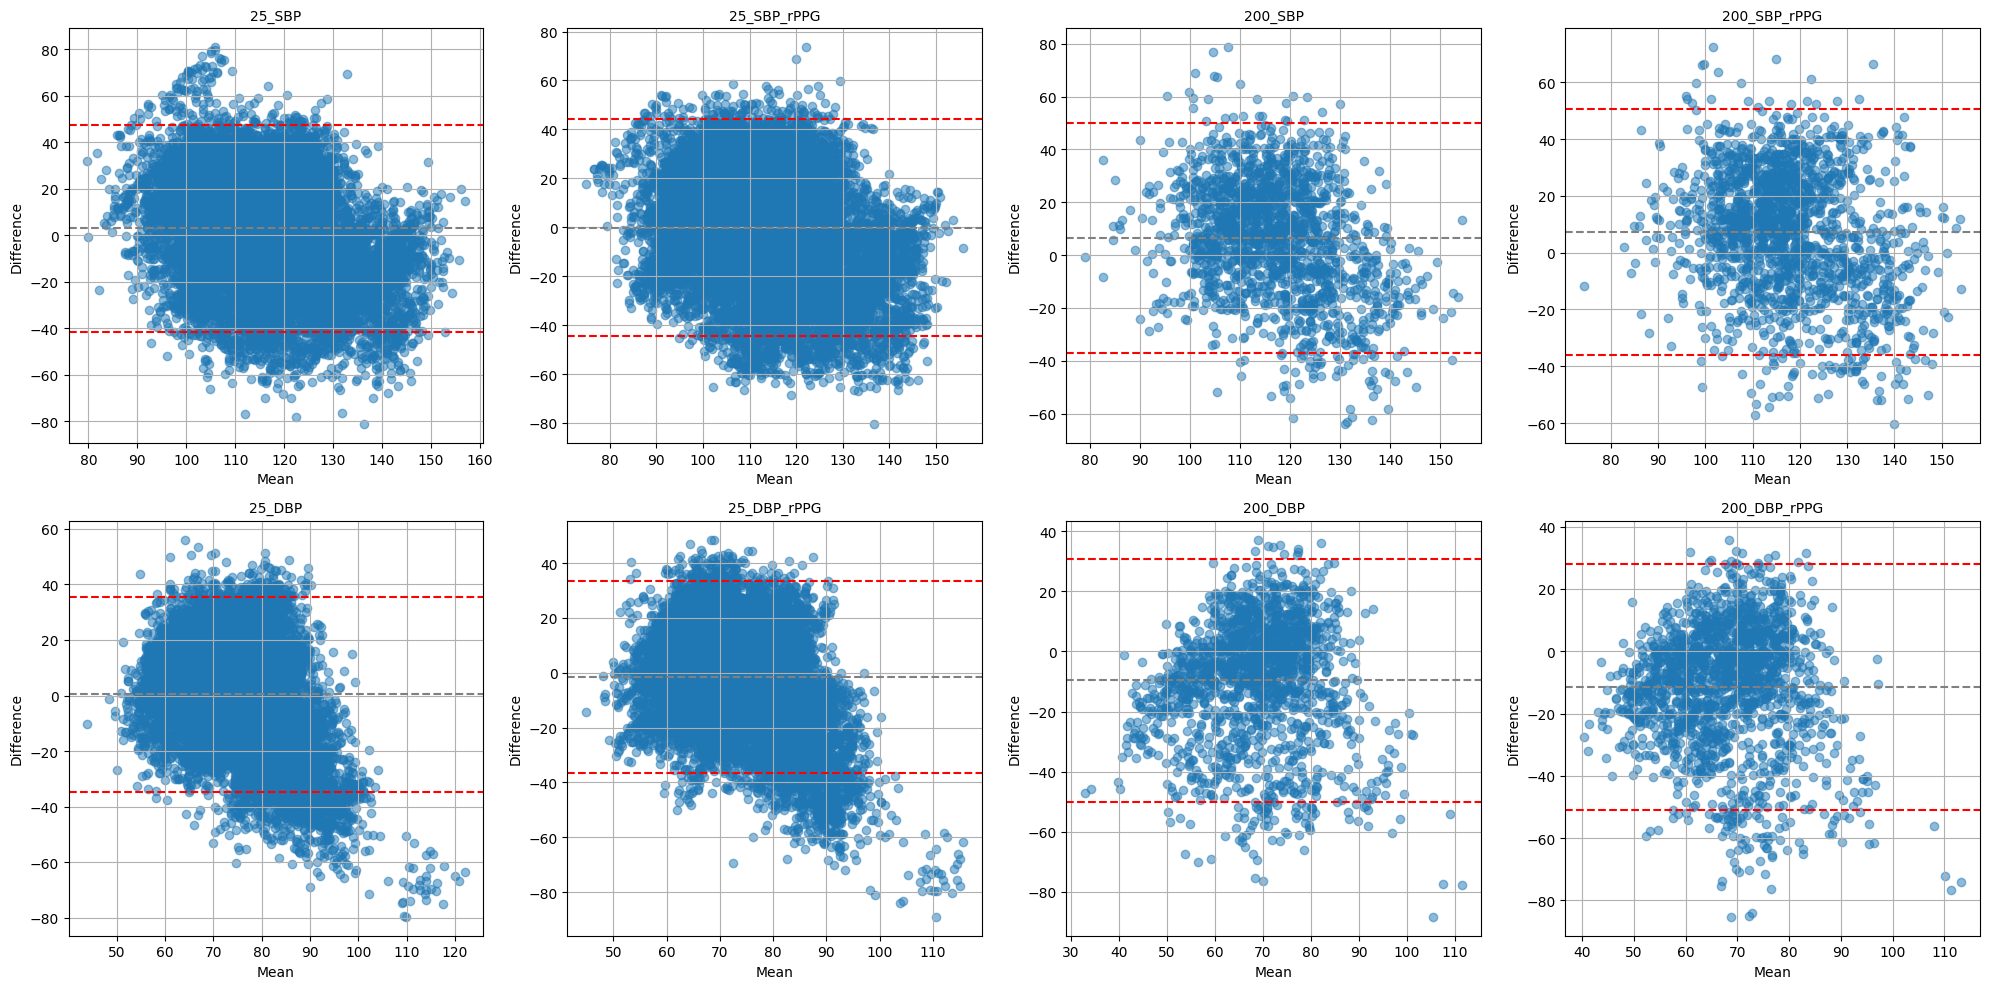

In [52]:
# Bland-Altman plot function
def bland_altman_subplot(ax, preds, gts, title):
    mean = (preds + gts) / 2
    diff = preds - gts
    md = np.mean(diff)
    sd = np.std(diff)
    upper = md + 1.96 * sd
    lower = md - 1.96 * sd

    ax.scatter(mean, diff, alpha=0.5)
    ax.axhline(md, color='gray', linestyle='--')
    ax.axhline(upper, color='red', linestyle='--')
    ax.axhline(lower, color='red', linestyle='--')
    ax.set_title(title, fontsize=10)
    ax.set_xlabel("Mean")
    ax.set_ylabel("Difference")
    ax.grid(True)

# Create 2x4 subplot of all Bland-Altman plots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, run_id in enumerate(run_ids):
    preds, gts = load_predictions(f"./results/{run_id}_test_predictions.json")
    clean_id = clean_run_id(run_id)
    bland_altman_subplot(axes[i], preds, gts, clean_id)

plt.tight_layout()
plt.show()


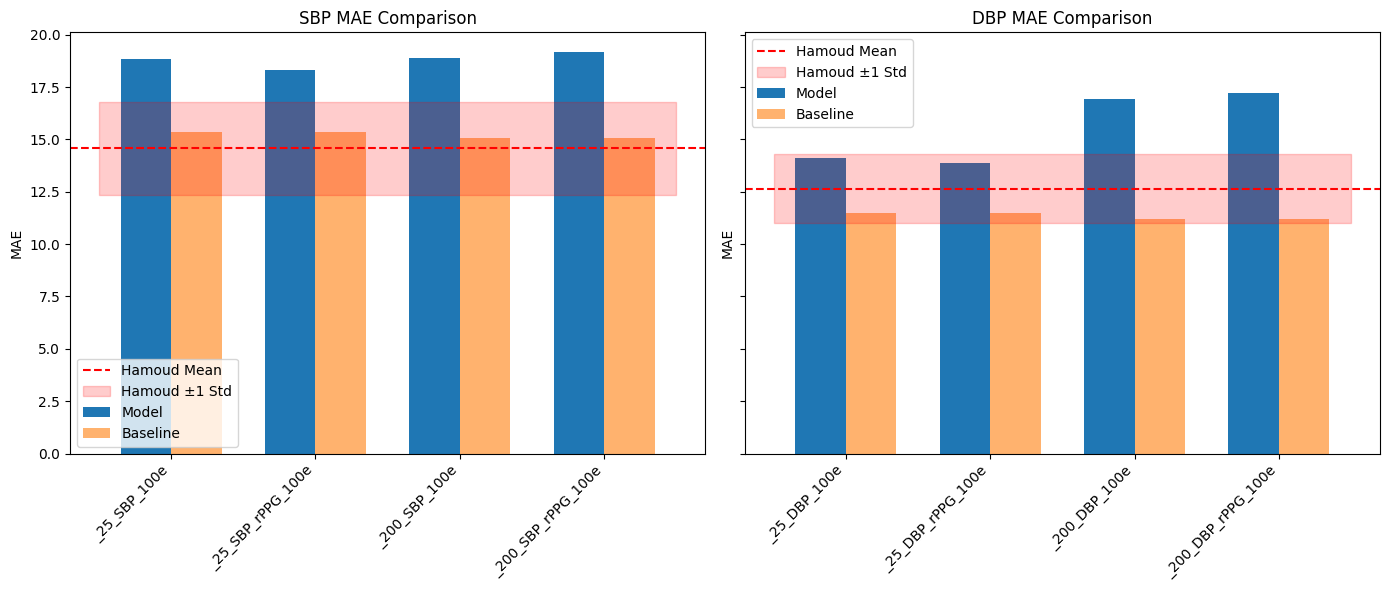

In [53]:
# Compute mean and std for each target
hamoud_summary = hamoud_df.groupby("Target").agg({
    "MAE": ["mean", "std"],
    "Mean Accuracy (%)": ["mean", "std"]
})

hamoud_summary.columns = ["Hamoud Mean MAE", "Hamoud Std MAE", "Hamoud Mean Accuracy", "Hamoud Std Accuracy"]
hamoud_summary = hamoud_summary.reset_index()

# Prepare comparison DataFrame from all_metrics
comparison_rows = []
for run_id, splits in all_metrics.items():
    target = "SBP" if "SBP" in run_id else "DBP"
    test_metrics = splits["Test"]
    baseline_metrics = splits["Baseline_Test"]
    comparison_rows.append({
        "run_id": run_id,
        "Target": target,
        "MAE": test_metrics["MAE"],
        "Mean Accuracy (%)": test_metrics["Mean Accuracy (%)"],
        "Baseline MAE": baseline_metrics["MAE"],
        "Baseline Accuracy (%)": baseline_metrics["Mean Accuracy (%)"]
    })

comparison_df = pd.DataFrame(comparison_rows)

# Merge with Hamoud summary
comparison_df = comparison_df.merge(hamoud_summary, on="Target", how="left")

# Plotting function for side-by-side subplots
def plot_side_by_side(df, metric, baseline_metric, hamoud_mean_col, hamoud_std_col):
    targets = ["SBP", "DBP"]
    fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    for i, target in enumerate(targets):
        subset = df[df["Target"] == target]
        x = np.arange(len(subset))
        width = 0.35

        axes[i].bar(x - width/2, subset[metric], width, label="Model")
        axes[i].bar(x + width/2, subset[baseline_metric], width, label="Baseline", alpha=0.6)

        # Hamoud mean and std
        hamoud_mean = subset[hamoud_mean_col].iloc[0]
        hamoud_std = subset[hamoud_std_col].iloc[0]
        axes[i].axhline(hamoud_mean, color='r', linestyle='--', label="Hamoud Mean")
        axes[i].fill_between([-0.5, len(x)-0.5], hamoud_mean - hamoud_std, hamoud_mean + hamoud_std,
                             color='r', alpha=0.2, label="Hamoud ±1 Std")

        axes[i].set_xticks(x)
        axes[i].set_xticklabels(subset["run_id"], rotation=45, ha='right')
        axes[i].set_title(f"{target} {metric} Comparison")
        axes[i].set_ylabel(metric)
        axes[i].legend()

    plt.tight_layout()
    plt.show()

# Generate side-by-side plots
plot_side_by_side(comparison_df, "MAE", "Baseline MAE", "Hamoud Mean MAE", "Hamoud Std MAE")
# plot_side_by_side(comparison_df, "Mean Accuracy (%)", "Baseline Accuracy (%)",
#                   "Hamoud Mean Accuracy", "Hamoud Std Accuracy")


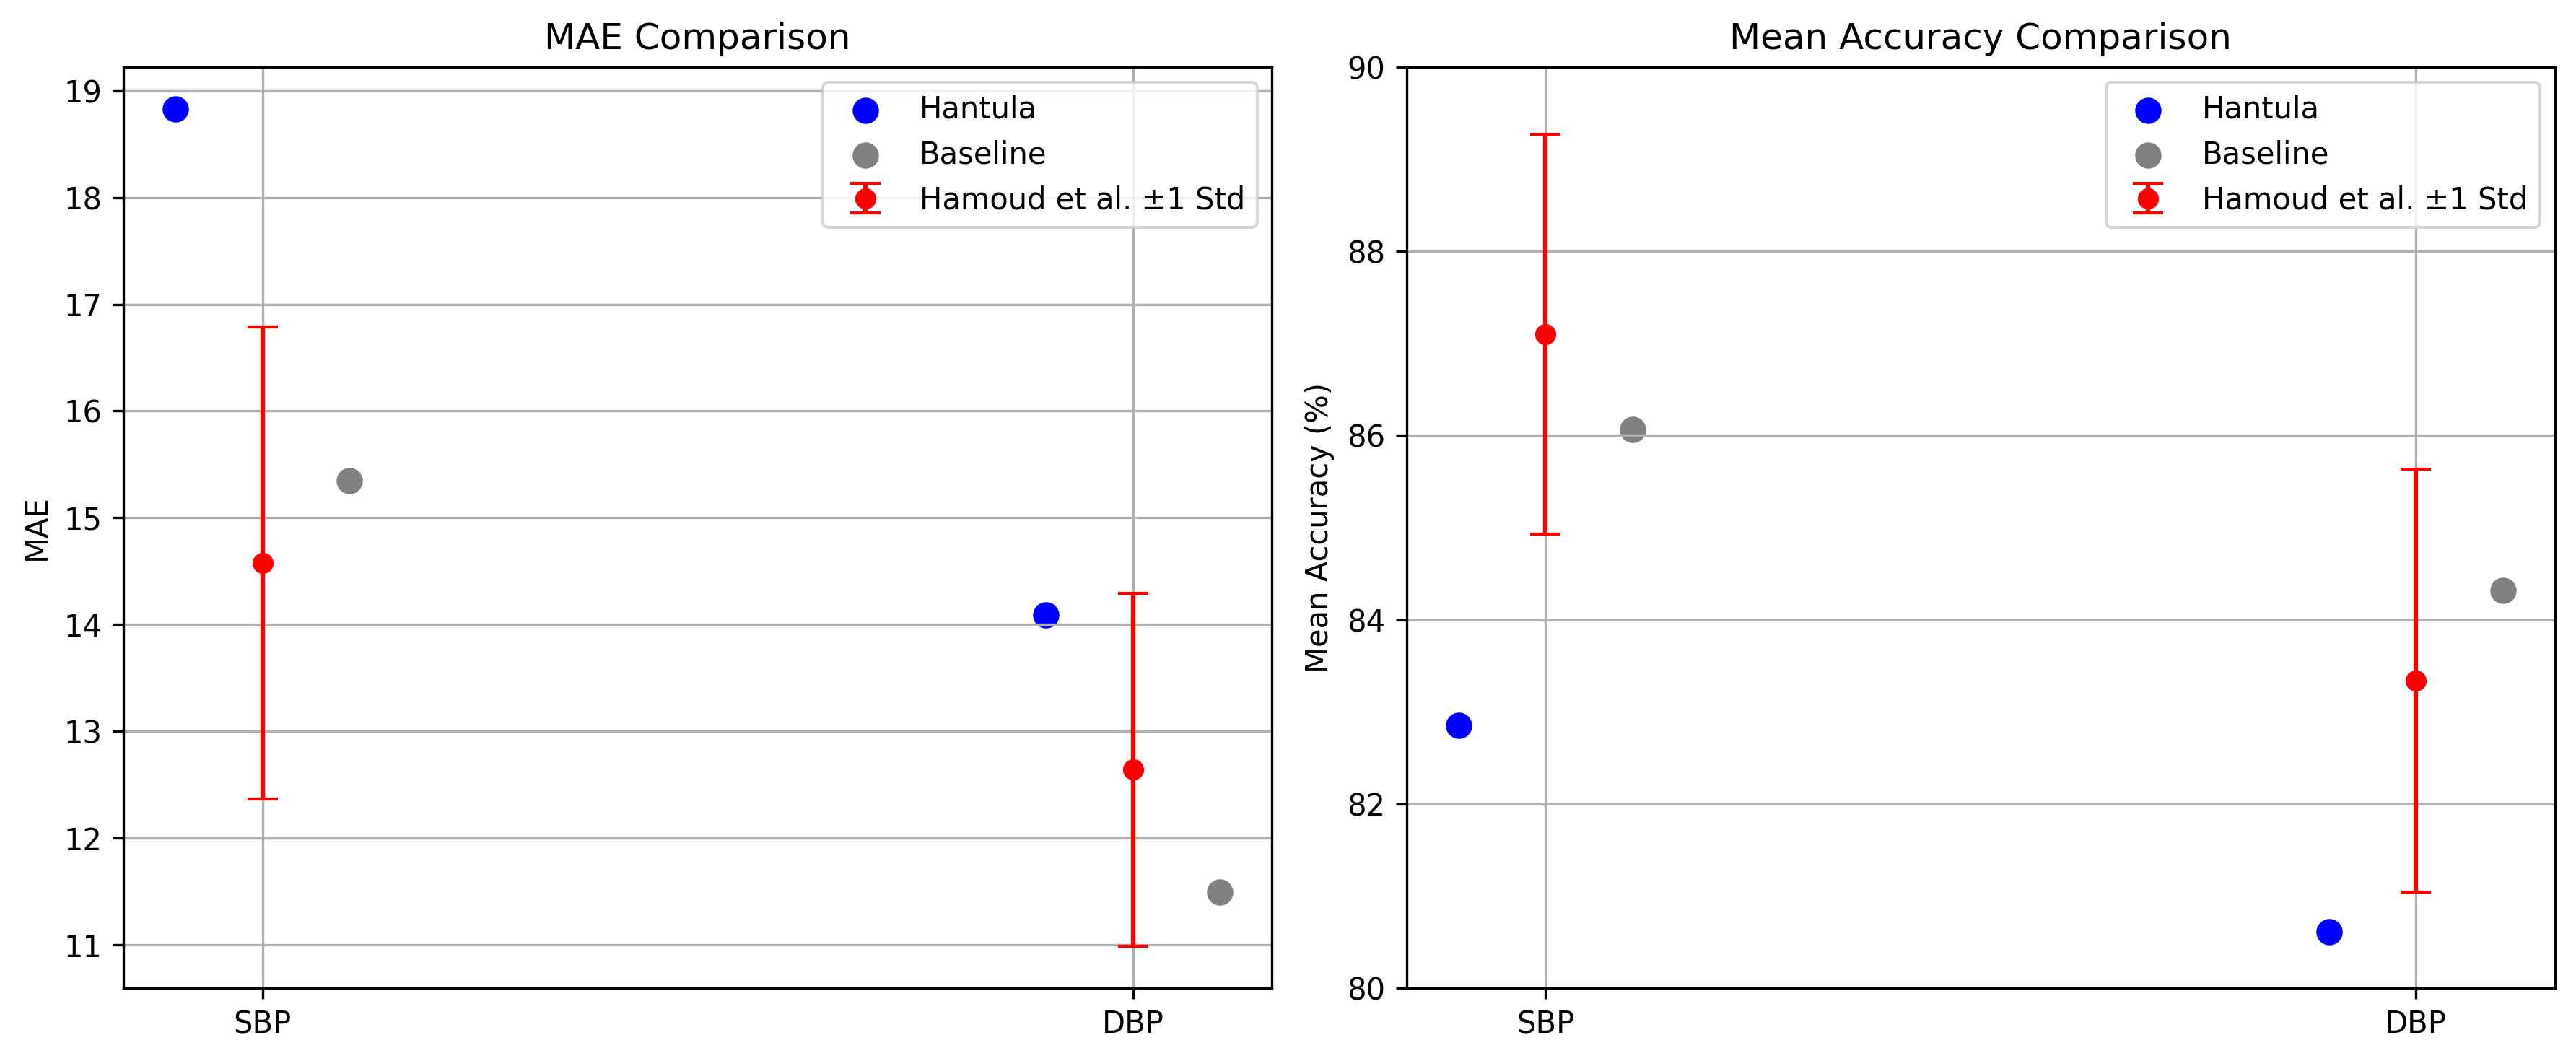

In [54]:
# Prepare comparison DataFrame from all_metrics
comparison_rows = []
for run_id, splits in all_metrics.items():
    if run_id in ["_25_SBP_100e", "_25_DBP_100e"]:
        target = "SBP" if "SBP" in run_id else "DBP"
        test_metrics = splits["Test"]
        baseline_metrics = splits["Baseline_Test"]
        comparison_rows.append({
            "run_id": run_id,
            "Target": target,
            "MAE": test_metrics["MAE"],
            "Mean Accuracy (%)": test_metrics["Mean Accuracy (%)"],
            "Baseline MAE": baseline_metrics["MAE"],
            "Baseline Accuracy (%)": baseline_metrics["Mean Accuracy (%)"]
        })

comparison_df = pd.DataFrame(comparison_rows)
comparison_df = comparison_df.merge(hamoud_summary, on="Target", how="left")

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

# MAE plot
for i, target in enumerate(["SBP", "DBP"]):
    subset = comparison_df[comparison_df["Target"] == target]
    axes[0].scatter(i - 0.1, subset["MAE"], color='blue', label='Hantula' if i == 0 else "", s=60)
    axes[0].scatter(i + 0.1, subset["Baseline MAE"], color='gray', label='Baseline' if i == 0 else "", s=60)
    axes[0].errorbar(i, subset["Hamoud Mean MAE"], yerr=subset["Hamoud Std MAE"],
                     fmt='o', color='red', label='Hamoud et al. ±1 Std' if i == 0 else "", capsize=5)

axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(["SBP", "DBP"])
axes[0].set_ylabel("MAE")
axes[0].set_title("MAE Comparison")
axes[0].legend()
axes[0].grid(True)

# Accuracy plot
for i, target in enumerate(["SBP", "DBP"]):
    subset = comparison_df[comparison_df["Target"] == target]
    axes[1].scatter(i - 0.1, subset["Mean Accuracy (%)"], color='blue', label='Hantula' if i == 0 else "", s=60)
    axes[1].scatter(i + 0.1, subset["Baseline Accuracy (%)"], color='gray', label='Baseline' if i == 0 else "", s=60)
    axes[1].errorbar(i, subset["Hamoud Mean Accuracy"], yerr=subset["Hamoud Std Accuracy"],
                     fmt='o', color='red', label='Hamoud et al. ±1 Std' if i == 0 else "", capsize=5)

axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(["SBP", "DBP"])
axes[1].set_ylabel("Mean Accuracy (%)")
axes[1].set_title("Mean Accuracy Comparison")
axes[1].set_ylim(80, 90)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
# plt.savefig("thesis_comparison_plots.png", dpi=300)
plt.show()

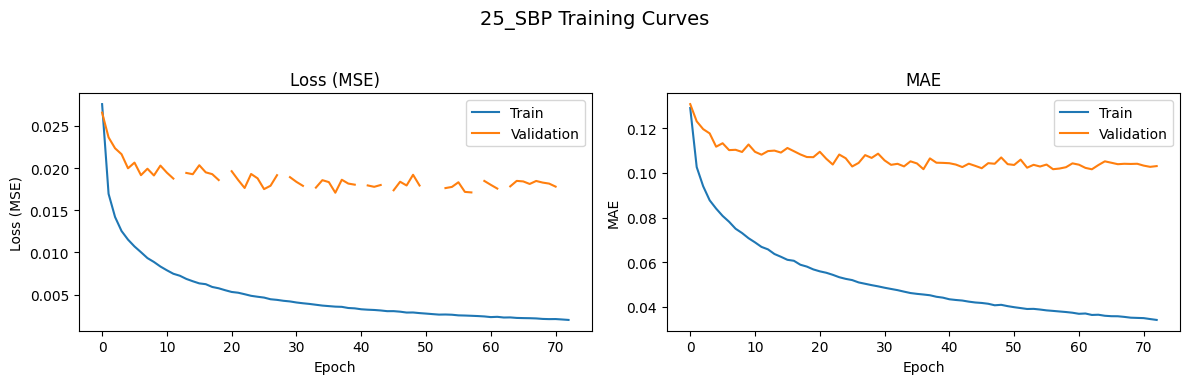

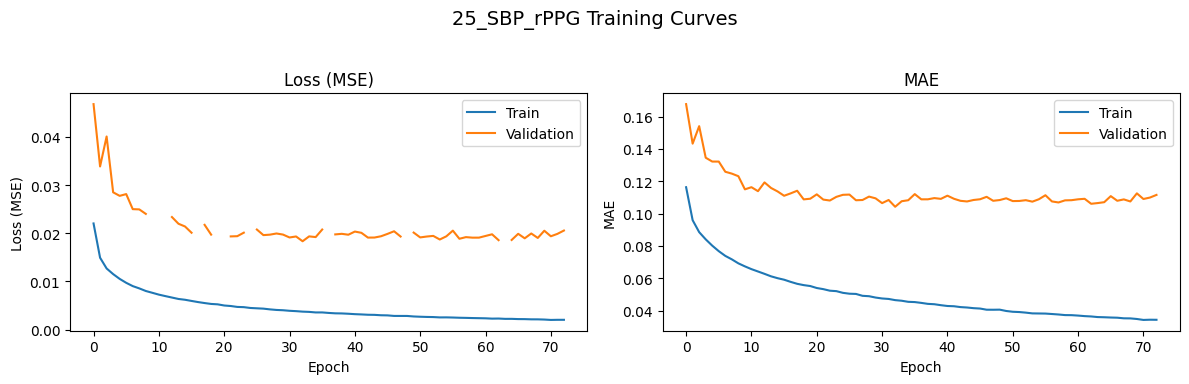

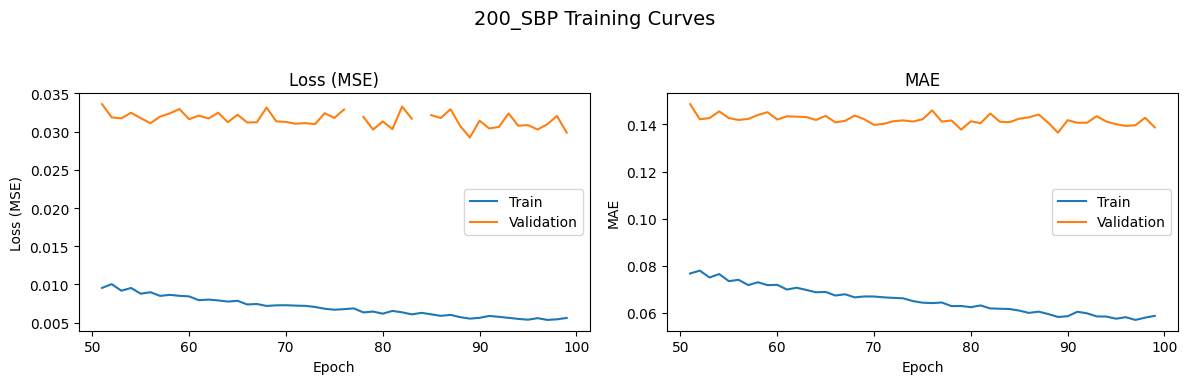

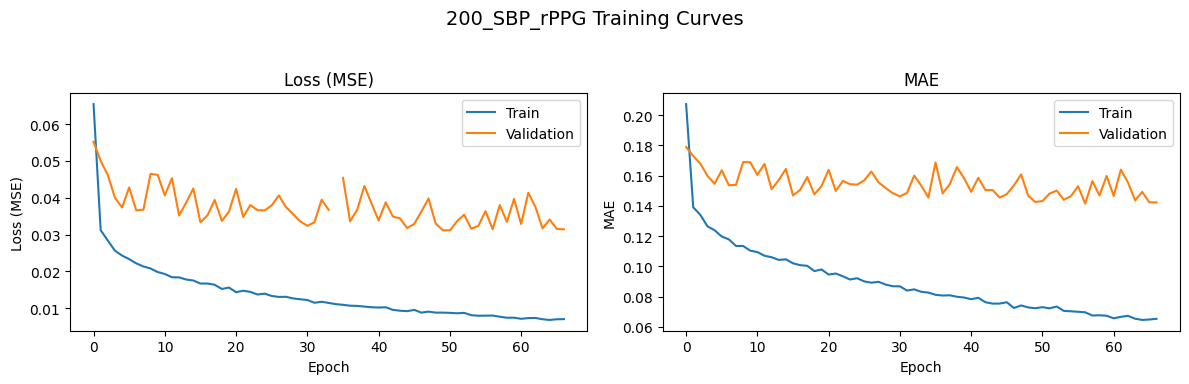

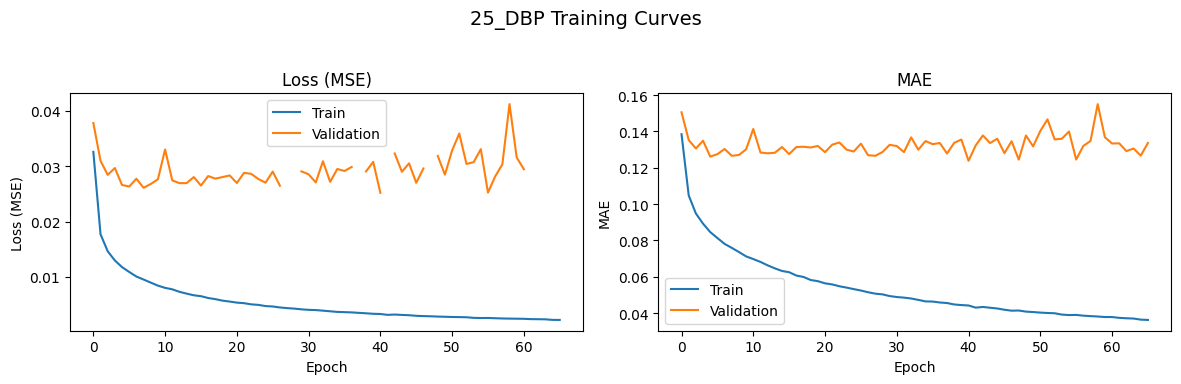

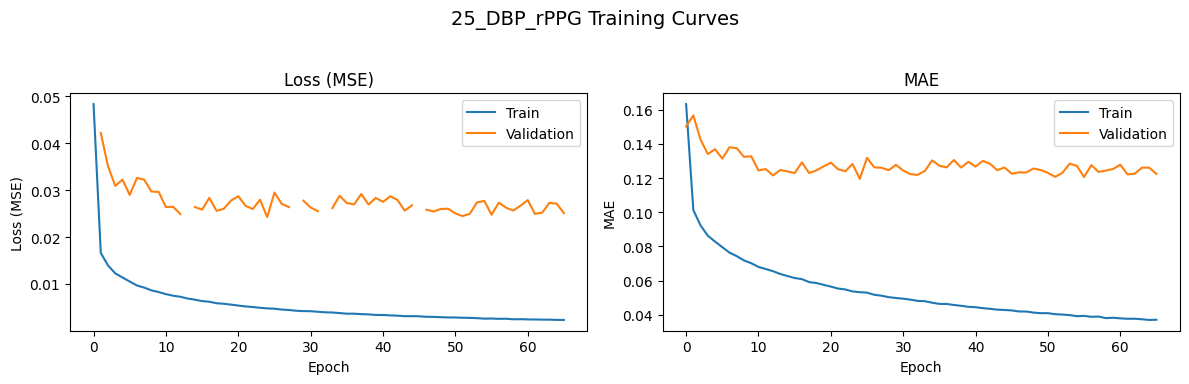

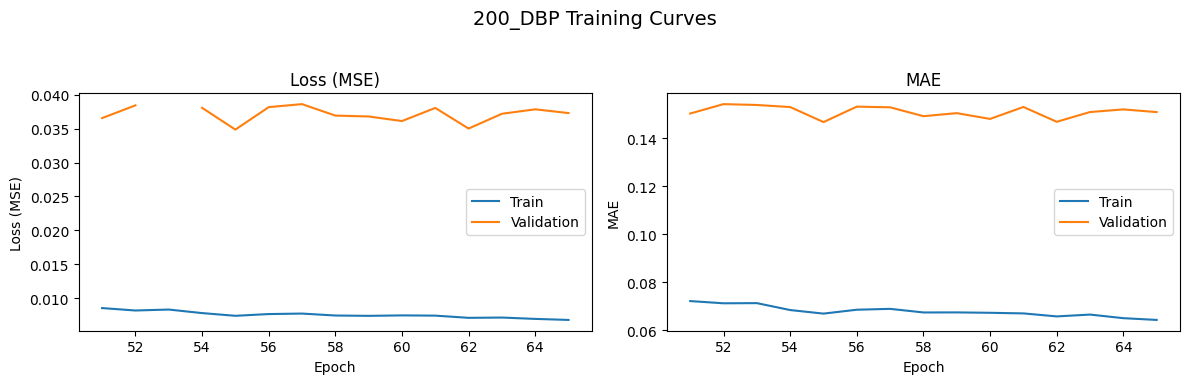

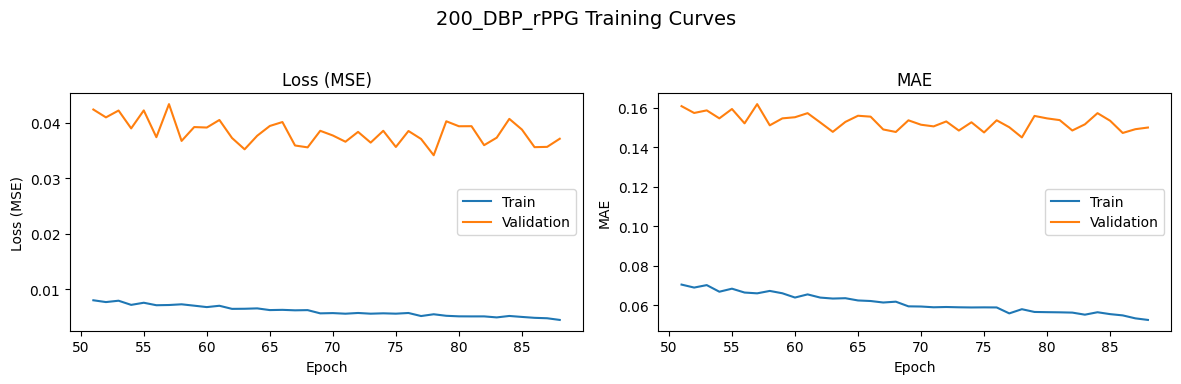

In [55]:
# Define which models should start plotting from epoch 50
start_at_50 = {"_200_SBP_100e", "_200_DBP_100e", "_200_DBP_rPPG_100e"}

# Create subplots for each model
for run_id in run_ids:
    cleaned_name = clean_run_id(run_id)
    metrics_path = f"./results/metrics_{run_id}.json"
    
    if not os.path.exists(metrics_path):
        print(f"File not found: {metrics_path}")
        continue

    with open(metrics_path, 'r') as f:
        data = json.load(f)
        train_loss = data["train_loss"]
        train_mae = data["train_mae"]
        val_loss = data["val_loss"]
        val_mae = data["val_mae"]

    # Determine starting epoch
    start_epoch = 51 if run_id in start_at_50 else 0
    epochs = list(range(start_epoch, start_epoch + len(train_loss)))

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    fig.suptitle(f"{cleaned_name} Training Curves", fontsize=14)

    # Loss plot
    axes[0].plot(epochs, train_loss, label="Train")
    axes[0].plot(epochs, val_loss, label="Validation")
    axes[0].set_title("Loss (MSE)")
    axes[0].set_xlabel("Epoch")
    axes[0].set_ylabel("Loss (MSE)")
    axes[0].legend()

    # MAE plot
    axes[1].plot(epochs, train_mae, label="Train")
    axes[1].plot(epochs, val_mae, label="Validation")
    axes[1].set_title("MAE")
    axes[1].set_xlabel("Epoch")
    axes[1].set_ylabel("MAE")
    axes[1].legend()

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

